# PCA of multiple molecules

## Isoelectronics: ethene and methylene immonium

In [45]:
import matplotlib.pyplot as plt
import xarray as xr

import shnitsel as sh
import shnitsel.xarray

In [46]:
A01 = sh.open_frames('/nc/reports/2025-05-21_datasheets/filtered_C2H4.nc')
I01 = sh.open_frames('/nc/SHNITSEL_databases/dynamic/I01_ch2nh2_dynamic.nc')

In [47]:
I01.sh.expand_midx('frame', 'cmpnd', 'I01')

<xarray.Dataset> Size: 49MB
Dimensions:    (state: 3, frame: 39365, direction: 3, statecomb: 3, atom: 6,
                state2: 3, trajid_: 200)
Coordinates: (12/13)
  * state      (state) int64 24B 1 2 3
  * state2     (state2) int64 24B 1 2 3
  * atom       (atom) int64 48B 0 1 2 3 4 5
  * direction  (direction) <U1 12B 'x' 'y' 'z'
    atNames    (atom) <U1 24B ...
  * trajid_    (trajid_) int32 800B 2 6 9 21 25 29 ... 920 924 929 938 943 947
    ...         ...
  * from       (statecomb) int64 24B 1 1 2
  * to         (statecomb) int64 24B 2 3 3
  * frame      (frame) object 315kB MultiIndex
  * cmpnd      (frame) object 315kB 'I01' 'I01' 'I01' ... 'I01' 'I01' 'I01'
  * trajid     (frame) int64 315kB 2 2 2 2 2 2 2 ... 947 947 947 947 947 947 947
  * time       (frame) float64 315kB 0.0 0.5 1.0 1.5 ... 98.5 99.0 99.5 100.0
Data variables:
    energy     (state, frame) float64 945kB ...
    dip_perm   (state, direction, frame) float64 3MB ...
    dip_trans  (statecomb, direction, frame) float64 3MB ...
    sdiag      (frame) int64 315kB ...
    astate     (frame) int64 315kB ...
    forces     (state, atom, direction, frame) float64 17MB ...
    phases     (state, frame) float64 945kB ...
    nacs       (statecomb, atom, direction, frame) float64 17MB ...
    atXYZ      (atom, direction, frame) float64 6MB ...
    max_ts     (trajid_) int32 800B ...
    completed  (trajid_) int8 200B ...
    nsteps     (trajid_) int32 800B ...
Attributes:
    delta_t:  0.5

In [48]:
isoelec = xr.concat(
    [
        A01.sh.expand_midx('frame', 'cmpnd', 'A01'),
        I01.sh.expand_midx('frame', 'cmpnd', 'I01')
    ],
    dim='frame'
)
isoelec

<xarray.Dataset> Size: 1GB
Dimensions:    (state: 3, frame: 101396, direction: 3, statecomb: 3, atom: 6,
                trajid_: 431, state2: 3)
Coordinates: (12/13)
  * state      (state) int64 24B 1 2 3
  * state2     (state2) int64 24B 1 2 3
  * atom       (atom) int64 48B 0 1 2 3 4 5
  * direction  (direction) <U1 12B 'x' 'y' 'z'
  * trajid_    (trajid_) int32 2kB 2 3 4 6 8 9 10 ... 950 951 956 957 961 962
  * statecomb  (statecomb) object 24B MultiIndex
    ...         ...
  * to         (statecomb) int64 24B 2 3 3
  * frame      (frame) object 811kB MultiIndex
  * cmpnd      (frame) object 811kB 'A01' 'A01' 'A01' ... 'I01' 'I01' 'I01'
  * trajid     (frame) int64 811kB 2 2 2 2 2 2 2 ... 947 947 947 947 947 947 947
  * time       (frame) float64 811kB 0.0 0.5 1.0 1.5 ... 98.5 99.0 99.5 100.0
    atNames    (frame, atom) <U1 2MB 'C' 'C' 'H' 'H' 'H' ... 'N' 'H' 'H' 'H' 'H'
Data variables: (12/13)
    energy     (state, frame) float64 2MB 0.8285 0.6196 0.3822 ... 11.89 12.12
    e_kin      (frame) float64 811kB 0.1839 0.4249 0.7293 0.9647 ... nan nan nan
    dip_perm   (state, direction, frame) float64 7MB 0.005891 0.005083 ... 1.512
    dip_trans  (statecomb, direction, frame) float64 7MB -1.421 ... 0.5138
    sdiag      (frame) int64 811kB 2 2 2 2 2 2 2 2 2 2 2 ... 1 1 1 1 1 1 1 1 1 1
    astate     (frame) int64 811kB 2 2 2 2 2 2 2 2 2 2 2 ... 1 1 1 1 1 1 1 1 1 1
    ...         ...
    phases     (state, frame) float64 2MB -1.0 1.0 1.0 1.0 ... nan nan nan nan
    nacs       (statecomb, atom, direction, frame) float64 44MB -0.2649 ... -...
    atXYZ      (atom, direction, frame) float64 15MB 0.003451 ... -0.7141
    max_ts     (frame, trajid_) float64 350MB 400.0 400.0 400.0 ... nan nan nan
    completed  (frame, trajid_) float32 175MB 1.0 1.0 1.0 nan ... nan nan nan
    nsteps     (frame, trajid_) float64 350MB 401.0 401.0 401.0 ... nan nan nan
Attributes:
    delta_t:  0.5

In [49]:
pca = isoelec.atXYZ.sh.subtract_combinations('atom').sh.norm('direction').sh.pca('atomcomb')
pca

<xarray.DataArray (frame: 101396, PC: 2)> Size: 2MB
array([[-0.06803225, -0.01136616],
       [-0.06715481, -0.01119581],
       [-0.06562691, -0.01127104],
       ...,
       [-0.03385819, -0.01737557],
       [-0.03412557, -0.01838565],
       [-0.03465515, -0.01939901]], shape=(101396, 2))
Coordinates:
  * frame    (frame) object 811kB MultiIndex
  * cmpnd    (frame) object 811kB 'A01' 'A01' 'A01' 'A01' ... 'I01' 'I01' 'I01'
  * trajid   (frame) int64 811kB 2 2 2 2 2 2 2 2 ... 947 947 947 947 947 947 947
  * time     (frame) float64 811kB 0.0 0.5 1.0 1.5 2.0 ... 98.5 99.0 99.5 100.0
Dimensions without coordinates: PC

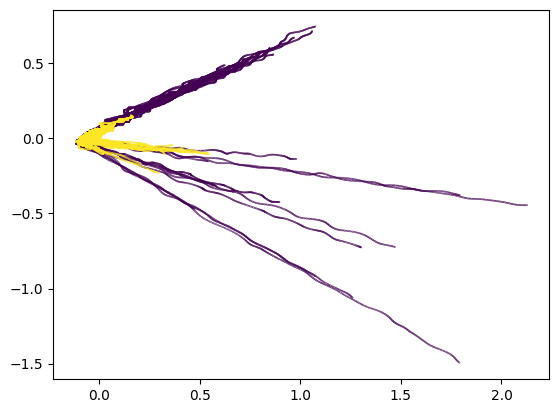

In [50]:
plt.scatter(pca[:,0], pca[:,1], s=0.1, c=xr.where(pca.cmpnd=='A01', 0, 1))

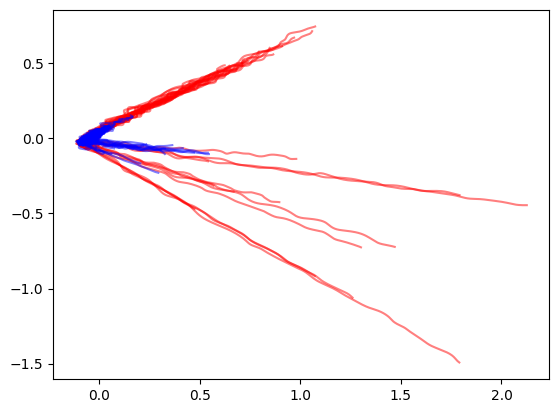

In [51]:
for lcmpnd, cmpnd in pca.groupby('cmpnd'):
    for ltraj, traj in cmpnd.groupby('trajid'):
        c = 'b' if lcmpnd == 'I01' else 'r'
        plt.plot(traj[:,0], traj[:,1], c=c, alpha=0.5)

## Now parts of homologous series

In [52]:
A02 = sh.open_frames('/nc/reports/2025-05-21_datasheets/filtered_C3H6.nc')
A03 = sh.open_frames('/nc/reports/2025-05-21_datasheets/filtered_C4H8_g0.nc')

In [53]:
def vis(frames, charge=0):
    mol = sh.dynamic.filter_unphysical.mol_from_atXYZ(
        frames.atXYZ.isel(frame=0), charge=charge, to2D=True
    )
    for atom in mol.GetAtoms():
        atom.SetProp("atomNote", str(atom.GetIdx()))
    return mol

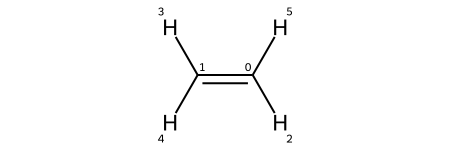

In [54]:
vis(A01, 0)

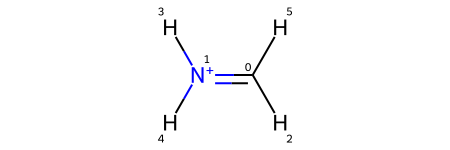

In [55]:
vis(I01, +1)

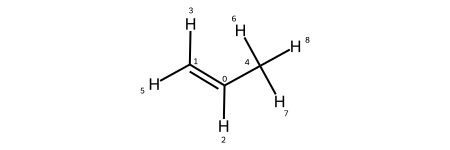

In [56]:
vis(A02)

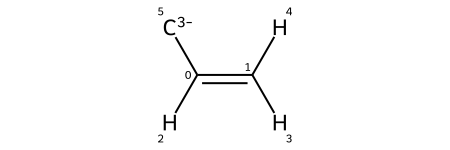

In [57]:
# Renumber: 4 <-> 5
A02new = A02.isel(atom=slice(0,6)).assign_coords(atom=[0, 1, 2, 3, 5, 4]).sortby('atom')
vis(A02new, -3)

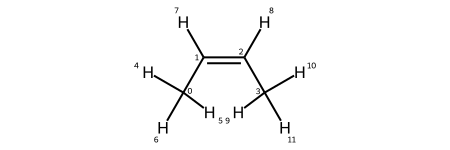

In [58]:
vis(A03)

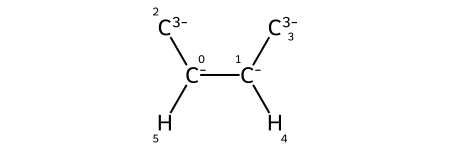

In [59]:
# Renumber: 0->3, 1->1, 2->0, 3->2, 4->4, 5->5,
A03new = A03.isel(atom=[0,1,2,3,7,8]).assign_coords(atom=[3, 1, 0, 2, 4, 5]).sortby('atom')
vis(A03new, -8)

In [60]:
homologs = xr.concat(
    [
        A01.sh.expand_midx('frame', 'cmpnd', 'A01'),
        I01.sh.expand_midx('frame', 'cmpnd', 'I01'),
        A02new.sh.expand_midx('frame', 'cmpnd', 'A02'),
        A03new.sh.expand_midx('frame', 'cmpnd', 'A03')
    ],
    dim='frame',
    coords='minimal',
    compat='override'
)
homologs

<xarray.Dataset> Size: 2GB
Dimensions:    (state: 3, frame: 151874, direction: 3, statecomb: 3, atom: 6,
                trajid_: 555, state2: 3)
Coordinates: (12/13)
  * state      (state) int64 24B 1 2 3
  * state2     (state2) int64 24B 1 2 3
  * atom       (atom) int64 48B 0 1 2 3 4 5
  * direction  (direction) <U1 12B 'x' 'y' 'z'
  * trajid_    (trajid_) int32 2kB 2 3 4 6 8 9 10 ... 955 956 957 961 962 969
  * statecomb  (statecomb) object 24B MultiIndex
    ...         ...
  * to         (statecomb) int64 24B 2 3 3
  * frame      (frame) object 1MB MultiIndex
  * cmpnd      (frame) object 1MB 'A01' 'A01' 'A01' 'A01' ... 'A03' 'A03' 'A03'
  * trajid     (frame) int64 1MB 2 2 2 2 2 2 2 2 ... 316 316 316 316 316 316 316
  * time       (frame) float64 1MB 0.0 0.5 1.0 1.5 2.0 ... 76.5 77.0 77.5 78.0
    atNames    (atom) <U1 24B 'C' 'C' 'H' 'H' 'H' 'H'
Data variables: (12/13)
    energy     (state, frame) float64 4MB 0.8285 0.6196 0.3822 ... 15.66 15.52
    e_kin      (frame) float64 1MB 0.1839 0.4249 0.7293 ... 6.936 7.527 8.137
    dip_perm   (state, direction, frame) float64 11MB 0.005891 ... -0.01176
    dip_trans  (statecomb, direction, frame) float64 11MB -1.421 ... 0.7723
    sdiag      (frame) int64 1MB 2 2 2 2 2 2 2 2 2 2 2 ... 1 1 1 1 1 1 1 1 1 1 1
    astate     (frame) int64 1MB 2 2 2 2 2 2 2 2 2 2 2 ... 1 1 1 1 1 1 1 1 1 1 1
    ...         ...
    phases     (state, frame) float64 4MB -1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    nacs       (statecomb, atom, direction, frame) float64 66MB -0.2649 ... -...
    atXYZ      (atom, direction, frame) float64 22MB 0.003451 ... -1.382
    max_ts     (frame, trajid_) float64 674MB 400.0 400.0 400.0 ... nan nan nan
    completed  (frame, trajid_) float32 337MB 1.0 1.0 1.0 nan ... nan nan nan
    nsteps     (frame, trajid_) float64 674MB 401.0 401.0 401.0 ... nan nan nan
Attributes:
    delta_t:  0.5

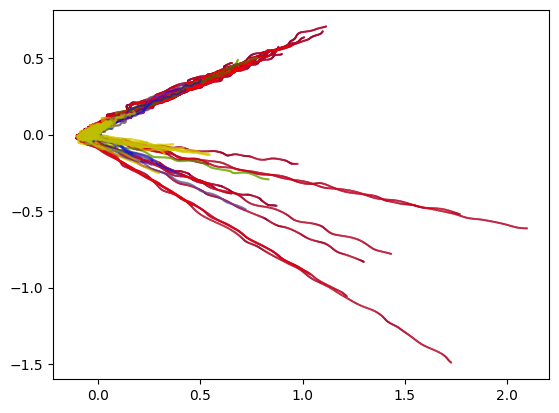

In [61]:
pwdist = homologs.atXYZ.sh.subtract_combinations('atom').sh.norm('direction')
pca = pwdist.sh.pca('atomcomb')
plt.scatter(pca[:,0], pca[:,1], s=0.1, c=xr.where(pca.cmpnd=='A01', 0, 1))
for lcmpnd, cmpnd in pca.groupby('cmpnd'):
    for ltraj, traj in cmpnd.groupby('trajid'):
        c = {
            'A01': 'r', 
            'A02': 'g', 
            'A03': 'b', 
            'I01': 'y', 
        }[lcmpnd]
        plt.plot(traj[:,0], traj[:,1], c=c, alpha=0.5)

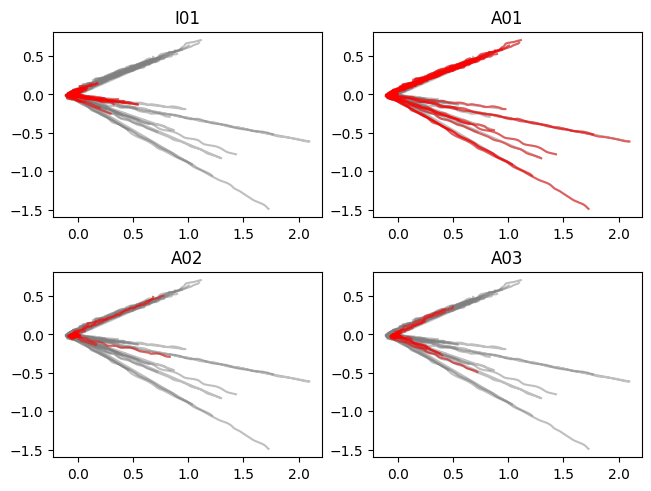

In [62]:
fig, axs = plt.subplot_mosaic([['I01', 'A01'],['A02', 'A03']], layout='constrained')

# grey background
for ax in axs.values():
    for _, traj in pca.groupby('trajid'):
        ax.plot(traj[:,0], traj[:,1], c='gray', alpha=0.5)

for name, cmpnd in pca.groupby('cmpnd'):
    ax = axs[name]
    for _, traj in cmpnd.groupby('trajid'):
        ax.plot(traj[:,0], traj[:,1], c='red', alpha=0.5)
    ax.set_title(name)


### Filter by PCA-adventurousness

In [63]:
fpca = sh.xrhelpers.flatten_levels(pca, 'frame', ['cmpnd', 'trajid'])
fpca

<xarray.DataArray (frame: 151874, PC: 2)> Size: 2MB
array([[-0.062883  , -0.00384595],
       [-0.0620098 , -0.00371305],
       [-0.06050289, -0.00385374],
       ...,
       [-0.01327303, -0.0261533 ],
       [-0.01487247, -0.02496546],
       [-0.01664111, -0.02353462]], shape=(151874, 2))
Coordinates:
  * frame    (frame) object 1MB MultiIndex
  * trajid   (frame) object 1MB ('A01', 2) ('A01', 2) ... ('A03', 316)
  * time     (frame) float64 1MB 0.0 0.5 1.0 1.5 2.0 ... 76.5 77.0 77.5 78.0
Dimensions without coordinates: PC

In [64]:
adventurousness = fpca.sh.norm('PC').groupby('trajid').max()
upca = fpca.sh.sel_trajids(adventurousness[adventurousness < 0.2].trajid)
upca

<xarray.DataArray (frame: 129412, PC: 2)> Size: 2MB
array([[-0.062883  , -0.00384595],
       [-0.0620098 , -0.00371305],
       [-0.06050289, -0.00385374],
       ...,
       [-0.01327303, -0.0261533 ],
       [-0.01487247, -0.02496546],
       [-0.01664111, -0.02353462]], shape=(129412, 2))
Coordinates:
  * frame    (frame) object 1MB MultiIndex
  * trajid   (frame) object 1MB ('A01', 2) ('A01', 2) ... ('A03', 316)
  * time     (frame) float64 1MB 0.0 0.5 1.0 1.5 2.0 ... 76.5 77.0 77.5 78.0
Dimensions without coordinates: PC

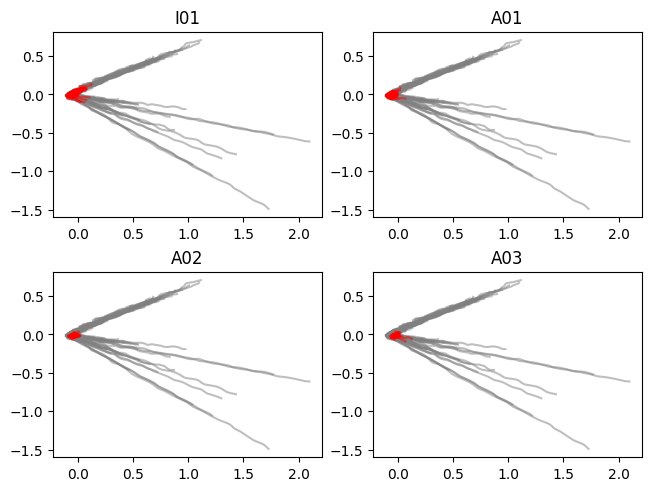

In [65]:
fig, axs = plt.subplot_mosaic([['I01', 'A01'],['A02', 'A03']], layout='constrained')

for name, ax in axs.items():
    ax.set_title(name)
    for (cmpnd, trajid), traj in fpca.groupby('trajid'):
        ax.plot(traj[:,0], traj[:,1], c='gray', alpha=0.5)

for (cmpnd, trajid), traj in upca.groupby('trajid'):
        axs[cmpnd].plot(traj[:,0], traj[:,1], c='r', alpha=0.5)

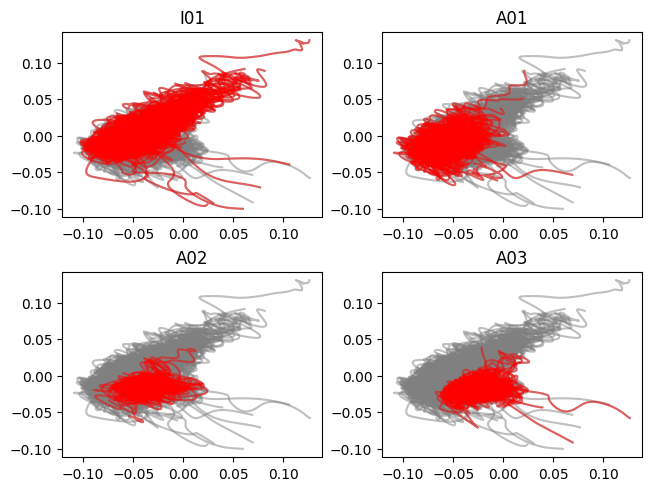

In [66]:
fig, axs = plt.subplot_mosaic([['I01', 'A01'],['A02', 'A03']], layout='constrained')

for name, ax in axs.items():
    ax.set_title(name)
    for (cmpnd, trajid), traj in upca.groupby('trajid'):
        ax.plot(traj[:,0], traj[:,1], c='gray', alpha=0.5)

for (cmpnd, trajid), traj in upca.groupby('trajid'):
        axs[cmpnd].plot(traj[:,0], traj[:,1], c='r', alpha=0.5)

# Identify clusters
Over all homologs/isoelectronics

## 1. On the frame level

### 1.1 $k$-means on frames before PCA

In [75]:
from sklearn.cluster import KMeans

In [76]:
pwdist

<xarray.DataArray (atomcomb: 15, frame: 151874)> Size: 18MB
array([[1.34517946, 1.35167321, 1.35899658, ..., 1.39987539, 1.38990291,
        1.38023807],
       [1.13050448, 1.11766826, 1.10153534, ..., 1.58987745, 1.59416328,
        1.59909496],
       [1.97807253, 2.00833229, 2.0540353 , ..., 2.77850595, 2.78378724,
        2.78811195],
       ...,
       [1.80253552, 1.82526038, 1.85919207, ..., 2.16714385, 2.15124017,
        2.13262422],
       [2.86438682, 2.88767066, 2.93184765, ..., 2.74421727, 2.77934834,
        2.82312523],
       [2.33257396, 2.33677163, 2.34617471, ..., 3.09194364, 3.04189055,
        2.98573338]], shape=(15, 151874))
Coordinates:
  * frame    (frame) object 1MB MultiIndex
  * cmpnd    (frame) object 1MB 'A01' 'A01' 'A01' 'A01' ... 'A03' 'A03' 'A03'
  * trajid   (frame) int64 1MB 2 2 2 2 2 2 2 2 ... 316 316 316 316 316 316 316
  * time     (frame) float64 1MB 0.0 0.5 1.0 1.5 2.0 ... 76.5 77.0 77.5 78.0
Dimensions without coordinates: atomcomb

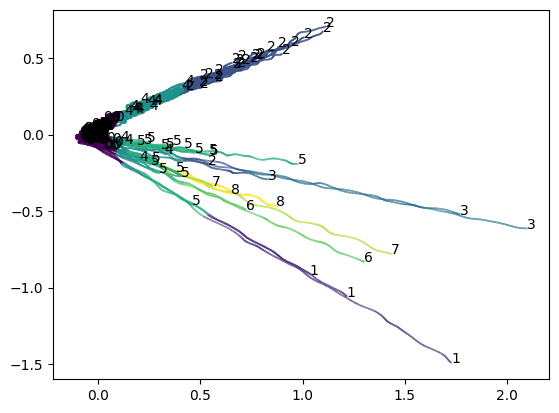

In [77]:
kmc = KMeans(n_clusters=9)
pwdist = pwdist.transpose('frame', 'atomcomb')
kmc.fit(pwdist)
res_kmc = kmc.predict(pwdist)
pca['cluster'] = 'frame', res_kmc

plt.scatter(pca[:,0], pca[:,1], c=res_kmc, s=0.1)
for lcmpnd, cmpnd in pca.groupby('cmpnd'):
    for ltraj, traj in cmpnd.groupby('trajid'):
        point = traj.isel(frame=-1)
        plt.text(point.item(0), point.item(1), point.cluster.item())

### 1.2. $k$-means on frames _after_ PCA

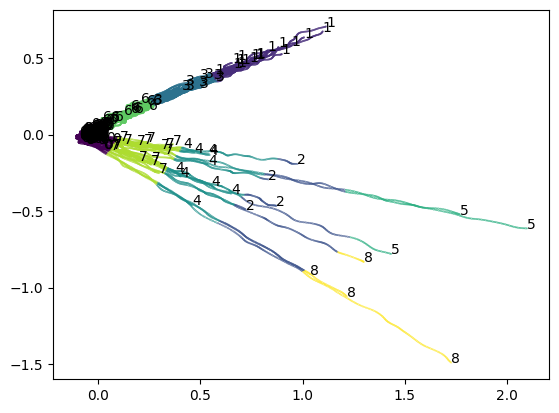

In [78]:
kmc = KMeans(n_clusters=9)
res_kmc = kmc.fit(pca).predict(pca)
pca['cluster'] = 'frame', res_kmc
plt.scatter(pca[:, 0], pca[:, 1], c=res_kmc, s=0.1)
for lcmpnd, cmpnd in pca.groupby('cmpnd'):
    for ltraj, traj in cmpnd.groupby('trajid'):
        point = traj.isel(frame=-1)
        plt.text(point.item(0), point.item(1), point.cluster.item())

### 1.3 Other clustering methods on frames
(Takes ages, non-viable)

In [79]:
# from sklearn.cluster import DBSCAN
# res_sc = DBSCAN().fit_predict(pwdist)
# pca['cluster'] = 'frame', res_sc
# plt.scatter(pca[:, 0], pca[:, 1], c=res_sc, s=0.1)
# for lcmpnd, cmpnd in pca.groupby('cmpnd'):
#     for ltraj, traj in cmpnd.groupby('trajid'):
#         point = traj.isel(frame=-1)
#         plt.text(point.item(0), point.item(1), point.cluster.item())

In [80]:
# from sklearn.cluster import AgglomerativeClustering
# res_sc = AgglomerativeClustering().fit_predict(pwdist)
# pca['cluster'] = 'frame', res_sc
# plt.scatter(pca[:, 0], pca[:, 1], c=res_sc, s=0.1)
# for lcmpnd, cmpnd in pca.groupby('cmpnd'):
#     for ltraj, traj in cmpnd.groupby('trajid'):
#         point = traj.isel(frame=-1)
#         plt.text(point.item(0), point.item(1), point.cluster.item())

## 2. On the trajectory level

### 2.1 Cluster trajectories by final frame

### 2.2 Cluster trajectories by final frame _after_ PCA

In [81]:
kmc = KMeans(n_clusters=7)
pca_final_frames = (
    pca
    .groupby('cmpnd').map(
        lambda cmpnd: cmpnd.groupby('trajid').map(
            lambda traj: traj.isel(frame=-1)
        )
    )
    .stack(traj=['cmpnd', 'trajid'])
    .dropna('traj', how='all')
    .transpose('traj', 'PC')
)
pca_final_frames

<xarray.DataArray (traj: 737, PC: 2)> Size: 12kB
array([[-0.04238037, -0.00901171],
       [-0.08275539, -0.02579526],
       [-0.08324099, -0.00550208],
       ...,
       [ 0.36541208, -0.06300364],
       [-0.03234839, -0.00783766],
       [-0.03001685, -0.01169662]], shape=(737, 2))
Coordinates:
    frame    (traj) object 6kB ('A01', np.int64(2), np.float64(83.5)) ... ('I...
    time     (traj) float64 6kB 83.5 109.0 94.0 199.5 ... 100.0 100.0 100.0
    cluster  (traj) float64 6kB 0.0 0.0 0.0 2.0 0.0 0.0 ... 0.0 0.0 7.0 0.0 0.0
  * traj     (traj) object 6kB MultiIndex
  * cmpnd    (traj) object 6kB 'A01' 'A01' 'A01' 'A01' ... 'I01' 'I01' 'I01'
  * trajid   (traj) int64 6kB 2 3 4 8 10 11 15 ... 919 920 924 929 938 943 947
Dimensions without coordinates: PC

In [82]:
# Better approach?

# (
#     pca
#     .reset_index('frame')
#     .assign_coords(
#         trajid=pca
#             .indexes['frame']
#             .map(lambda x: '_'.join([x[0], str(x[1])]))
#     )
#     .drop_vars('cmpnd')
# )

In [83]:
res_kmc = kmc.fit(pca_final_frames).predict(pca_final_frames)
res_kmc = pca_final_frames.isel(PC=0).copy(data=res_kmc)
res_kmc

<xarray.DataArray (traj: 737)> Size: 3kB
array([4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 2, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4,
       1, 0, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 6, 4, 4, 1, 4, 4, 4, 4, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 6, 6, 4,
       4, 4, 1, 4, 4, 4, 4, 1, 4, 1, 3, 4, 4, 4, 4, 2, 6, 4, 4, 6, 4, 4,
       2, 6, 4, 4, 4, 0, 1, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 4, 4, 1, 4, 4, 0, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 1, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 3, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 0, 6, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 6, 4, 4, 4, 0, 4, 4, 4, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 1,
       4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 3, 0, 4, 0, 4, 4, 4, 4, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 0, 0, 4, 0, 5, 4, 4, 0, 4, 4, 0,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 5, 0, 4, 6,
       4, 0, 6, 4, 0, 4, 4, 6, 4, 0, 4, 4, 4, 4, 0, 4, 0, 4, 4, 0, 4, 4,
       0, 4, 4, 4, 4, 4, 0, 0, 0, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 0, 0, 0,
       4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 0,
       4, 4, 0, 0, 4, 0, 4, 4, 0, 0, 4, 4, 4, 4, 4, 0, 4, 3, 0, 4, 5, 0,
       4, 4, 4, 4, 4, 4, 0, 0, 0, 4, 4, 6, 4, 0, 4, 4, 4, 4, 0, 0, 4, 4,
       4, 4, 4, 0, 4, 4, 0, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4,
       4, 4, 0, 4, 0, 4, 4, 4, 4, 4, 0, 4, 0, 4, 0, 4, 4, 4, 4, 4, 0, 4,
       4, 0, 0, 0, 4, 4, 0, 3, 4, 4, 0, 5, 4, 0, 4, 4, 4, 0, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 5, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 4,
       0, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4,
       4, 4, 0, 4, 4, 4, 4, 5, 4, 4, 4, 0, 0, 3, 4, 4, 4, 4, 0, 4, 5, 4,
       4, 4, 4, 0, 4, 4, 4, 4, 5, 0, 5, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4,
       4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 5, 0, 4, 5, 4, 4, 4, 0,
       4, 5, 4, 4, 4, 0, 5, 0, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 4,
       0, 4, 0, 0, 4, 4, 4, 4, 5, 4, 4], dtype=int32)
Coordinates:
    frame    (traj) object 6kB ('A01', np.int64(2), np.float64(83.5)) ... ('I...
    time     (traj) float64 6kB 83.5 109.0 94.0 199.5 ... 100.0 100.0 100.0
    cluster  (traj) float64 6kB 0.0 0.0 0.0 2.0 0.0 0.0 ... 0.0 0.0 7.0 0.0 0.0
  * traj     (traj) object 6kB MultiIndex
  * cmpnd    (traj) object 6kB 'A01' 'A01' 'A01' 'A01' ... 'I01' 'I01' 'I01'
  * trajid   (traj) int64 6kB 2 3 4 8 10 11 15 ... 919 920 924 929 938 943 947

In [85]:
pca['cluster'] = res_kmc
plt.scatter(pca[:, 0], pca[:, 1], c=res_kmc, s=0.1)
for lcmpnd, cmpnd in pca.groupby('cmpnd'):
    for ltraj, traj in cmpnd.groupby('trajid'):
        point = traj.isel(frame=-1)
        plt.text(point.item(0), point.item(1), point.cluster.item())

AlignmentError: cannot align objects on coordinate 'cmpnd' because of conflicting indexes
first index: PandasIndex(MultiIndex([('A01',   2),
            ('A01',   3),
            ('A01',   4),
            ('A01',   8),
            ('A01',  10),
            ('A01',  11),
            ('A01',  15),
            ('A01',  16),
            ('A01',  17),
            ('A01',  19),
            ...
            ('I01', 900),
            ('I01', 905),
            ('I01', 908),
            ('I01', 919),
            ('I01', 920),
            ('I01', 924),
            ('I01', 929),
            ('I01', 938),
            ('I01', 943),
            ('I01', 947)],
           name='traj', length=737))
second index: PandasIndex(MultiIndex([('A01',   2,  0.0),
            ('A01',   2,  0.5),
            ('A01',   2,  1.0),
            ('A01',   2,  1.5),
            ('A01',   2,  2.0),
            ('A01',   2,  2.5),
            ('A01',   2,  3.0),
            ('A01',   2,  3.5),
            ('A01',   2,  4.0),
            ('A01',   2,  4.5),
            ...
            ('A03', 316, 73.5),
            ('A03', 316, 74.0),
            ('A03', 316, 74.5),
            ('A03', 316, 75.0),
            ('A03', 316, 75.5),
            ('A03', 316, 76.0),
            ('A03', 316, 76.5),
            ('A03', 316, 77.0),
            ('A03', 316, 77.5),
            ('A03', 316, 78.0)],
           name='frame', length=151874))
first variable: <xarray.IndexVariable 'traj' (traj: 737)> Size: 6kB
array(['A01', 'A01', 'A01', ..., 'I01', 'I01', 'I01'],
      shape=(737,), dtype=object)
second variable: <xarray.IndexVariable 'frame' (frame: 151874)> Size: 1MB
array(['A01', 'A01', 'A01', ..., 'A03', 'A03', 'A03'],
      shape=(151874,), dtype=object)


In [ ]:
cmap = plt.get_cmap('viridis').resampled(12).colors
fig, axs = plt.subplot_mosaic([['I01', 'A01'],['A02', 'A03']], layout='constrained')

# grey background
for ax in axs.values():
    for _, traj in pca.groupby('trajid'):
        ax.plot(traj[:,0], traj[:,1], c='gray', alpha=0.5)

for name, cmpnd in pca.groupby('cmpnd'):
    seen_clusters = []
    ax = axs[name]
    for trajid, traj in cmpnd.groupby('trajid'):
        cluster = res_kmc.sel(cmpnd=name, trajid=trajid).item()
        c = cmap[cluster]
        ax.plot(traj[:,0], traj[:,1], c=c, alpha=0.5, label='' if cluster in seen_clusters else cluster)
        seen_clusters.append(cluster)
        point = traj.isel(frame=-1)
        ax.text(point.item(0), point.item(1), point.cluster.item()) # WRONG!
    ax.set_title(name)
    ax.legend()

In [ ]:
for trajid, traj in pca.groupby('trajid'):
    print(trajid, traj.cmpnd)
    break
    plt.scatter(pca[:, 0], pca[:, 1], c=res_kmc, s=0.1)

### (Previous work)

In [ ]:
upwdist = pwdist.unstack('frame').stack(traj=['cmpnd', 'trajid']).stack(special=['time', 'atomcomb']).dropna('traj', how='all')
upwdist

In [ ]:
dupwdist = upwdist.dropna('special', how='any')#.dropna('traj', how='any'))
dupwdist

In [ ]:
dupwdist.isel(special=0)

In [ ]:
kmc = KMeans(n_clusters=10)
kmc.fit(dupwdist)
res_kmc = kmc.predict(dupwdist)
tmp = dupwdist.isel(special=0).drop_vars(['special', 'time', 'atomcomb'])
res_kmc = tmp.copy(data=res_kmc)
res_kmc

In [ ]:
cmap = plt.get_cmap('tab10').colors#.resampled(12).colors

In [ ]:
fig, axs = plt.subplot_mosaic([['I01', 'A01'],['A02', 'A03']], layout='constrained')

# grey background
for ax in axs.values():
    for _, traj in pca.groupby('trajid'):
        ax.plot(traj[:,0], traj[:,1], c='gray', alpha=0.5)

for name, cmpnd in pca.groupby('cmpnd'):
    seen_clusters = []
    ax = axs[name]
    for trajid, traj in cmpnd.groupby('trajid'):
        cluster = res_kmc.sel(cmpnd=name, trajid=trajid).item()
        c = cmap[cluster]
        ax.plot(traj[:,0], traj[:,1], c=c, alpha=0.5, label='' if cluster in seen_clusters else cluster)
        seen_clusters.append(cluster)
    ax.set_title(name)
    ax.legend()